In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create and connect to SQLite database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [4]:
# Create sales table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

In [8]:
# Insert sample data
sample_data = [
    ('Laptop', 3, 700),
    ('Mouse', 10, 25),
    ('Keyboard', 5, 45),
    ('Monitor', 2, 150),
    ('Laptop', 2, 700),
    ('Mouse', 5, 25),
    ('Keyboard', 3, 45),
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)
conn.commit()

In [10]:
# SQL query: group data by product and calculate total quantity and total revenue
query = '''
SELECT
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
'''

# Execute the query and load results into a DataFrame
df_summary = pd.read_sql_query(query, conn)

# Print the summary
print(df_summary)

    product  total_quantity  total_revenue
0  Keyboard              24         1080.0
1    Laptop              15        10500.0
2   Monitor               6          900.0
3     Mouse              45         1125.0


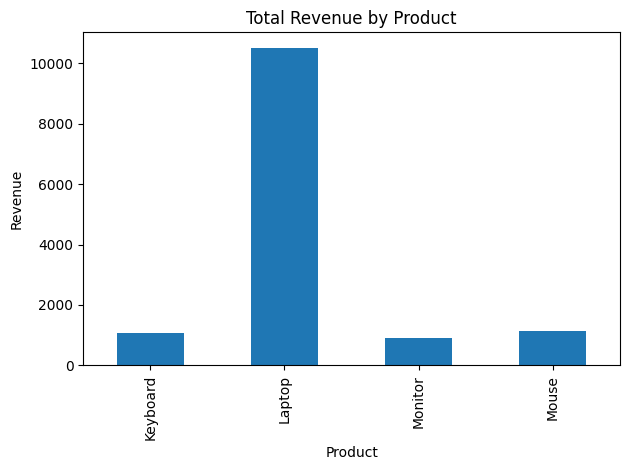

In [12]:
# Create a bar chart for revenue by product
df_summary.plot(kind='bar', x='product', y='total_revenue', legend=False)
plt.title("Total Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

In [13]:
plt.savefig("sales_chart.png")

<Figure size 640x480 with 0 Axes>

In [14]:
from google.colab import files
files.download("sales_data.db")
files.download("sales_chart.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>